In [1]:
import os
import estimator
from qiskit_aer import Aer, AerSimulator

import Ramsey_ExperimentV2
import random
import importlib
from tqdm import tqdm
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

In [2]:
import Symbolic.symbolic_evolution as symbolic_evolution
importlib.reload(symbolic_evolution)
symbolic_exp = symbolic_evolution.get_expectation_values_exp(3, neighbors=0)

In [8]:
import numpy as np
difference = []
import math
for k in tqdm(range(50)):
    n = 3
    total_shots = 10000
    T = np.pi
    measurements = 40
    delay = np.linspace(0, T, measurements)

    W = [random.gauss(0, 3) for _ in range(n)]
    # L = [random.gauss(1, 1) for _ in range(n)]
    L = [np.abs(w*0.7) for w in W]
    J = [random.gauss(0, 0) for _ in range(n - 1)]

    # L =  [0.8730355090716002, 1.433526482334413, 0.3905186270259645]
    # J = [0.5,-0.7]
    # W = [-1.2471935843880004, 2.047894974763447, 0.5578837528942351]


    # delay_single = [1]
    delay_single = [np.random.uniform(0, 1)]
    batch_x, batch_y = ramsey_experiment.ramsey_global(n,total_shots,delay,L,W,J)

    neighbors = 1
    guessed_decay,guessed_W,guessed_J = estimator.full_complex_fit(batch_x, batch_y, neighbors=neighbors)

    time = np.linspace(0, T, 100)
    X_model = [symbolic_evolution.set_parameters(symbolic_exp[1],W,J,L,t) for t in time]
    X_guessed = [symbolic_evolution.set_parameters(symbolic_exp[1],guessed_W,guessed_J,guessed_decay,t) for t in time]
    difference.append(np.array(X_model)-np.array(X_guessed))



100%|██████████| 50/50 [12:31<00:00, 15.04s/it]


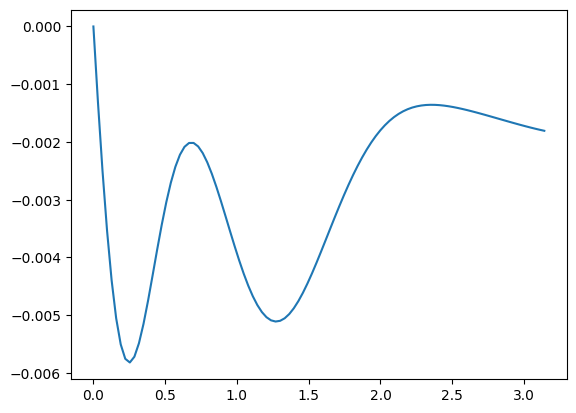

In [14]:
import matplotlib.pyplot as plt
time = np.linspace(0, T, 100)
plt.plot(time, np.mean(difference, axis=0))